# Deflection of a photon by a Black Hole

We want to implement the formula
$$
\hat{\alpha}=-\pi+4\frac{G}{c^2}\sqrt{R_m/s}F(\varphi,m)
$$
with
\begin{eqnarray}
s&=&\sqrt{(R_m-2M)(R_m+6M)} \\
m&=&(s-R_m+6M)/2s \\
\varphi &=& \arcsin{\sqrt{2s/(3R_m-6M+s)}}
\end{eqnarray}

We also need to remind that 
$$
u^2=\frac{C(R_m)}{A(R_m)}
$$

We will compare the resulting deflection angle to 
$$
\hat\alpha=\frac{4GM}{c^2u}
$$


We start by importing some useful packages

In [1]:
# need special functions for incomplete elliptic integrals of the first kind
from scipy import special as sy 
# efficient vector and matrix operations
import numpy as np 
# Provides a MATLAB-like plotting framework.
import matplotlib.pyplot as plt 
# only needed in jupyter notebooks
%matplotlib inline 

We will need some special function from scipy in order to compute the elliptic integral of the first kind. See https://docs.scipy.org/doc/scipy/reference/special.html

/Users/massimo/anaconda/envs/python2x/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


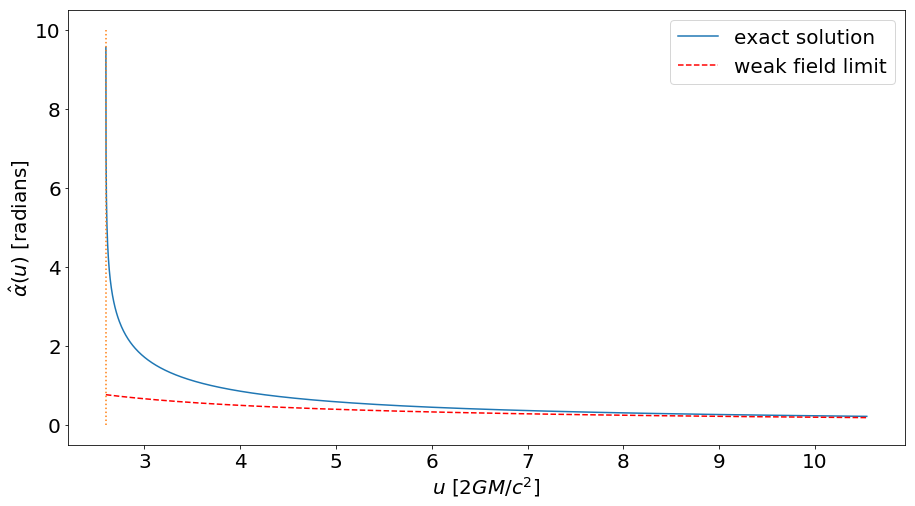

In [2]:
# our goal is to produce a graph. Let's setup the fonts and the character size
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

import matplotlib
matplotlib.rc('font', **font)

# build a class for BH objects
class point_bh:
    
    def __init__(self,M):
        self.M=M
    
    # functions which define the metric. We need only A(r) and C(r) to compute u from rm
    def A(self,r):
        return(1.0-2.0*self.M/r)
    
    def B(self,r):
        return (self.A(r)**(-1))
    
    def C(self,r):
        return(r**2)
    
    # compute u from rm
    def u(self,r):
        u=np.sqrt(self.C(r)/self.A(r))
        return(u)
    
    # functions concurring to the deflection angle calculation
    def ss(self,r):
        return(np.sqrt((r-2.0*self.M)*(r+6.0*self.M)))
    
    def mm(self,r,s):
        return((s-r+6.0*self.M)/2/s)
    
    def phif(self,r,s):
        return(np.arcsin(np.sqrt(2.0*s/(3.0*r-6.0*self.M+s))))
    
    # the deflection angle
    def defAngle(self,r):
        s=self.ss(r)
        m=self.mm(r,s)
        phi=self.phif(r,s)
        F=sy.ellipkinc(phi, m) ## using the ellipkinc function from scipy.special
        return(-np.pi+4.0*np.sqrt(r/s)*F)

# build a class for point mass lenses implementing the results in the weak field limit    
class point_mass:
    
    def __init__(self,M):
        self.M=M
    
    # the classical formula
    def defAngle(self,u):
        return(4.0*self.M/u)
    

# construct a BH and a PM objects. The mass is fixed to 3 Msun (Rs=9km)
bh=point_bh(3.0)
pm=point_mass(3.0)

# initialize rm and compute u
r=np.linspace(3.0/2.0,10,1000)*2.0*bh.M
u=bh.u(r)/2.0/bh.M

# compute the deflection angles for the two lenses
a=bh.defAngle(r)
b=pm.defAngle(u*2.0*bh.M)

# plot the results
fig,ax=plt.subplots(1,1,figsize=(15,8)) # Create a figure and a set of subplots (1x1 subplots). 
                                        # Specify the size (in inches)
ax.plot(u,a,'-',label='exact solution') # plot the curve for the exact solution in ax
ax.plot(u,b,'--',label='weak field limit',color='red') # plot the curve for the weak field limit in ax
ax.set_xlabel(r'$u$ $[2GM/c^2]$') # set label on the x-axis
ax.set_ylabel(r'$\hat\alpha(u)$ [radians]') # set label on the y-axis
ax.legend() # display the legend

# plot a vertical dotted line at u=3\sqrt(3)/2M
x=[np.min(u),np.min(u)]
y=[0,10]
ax.plot(x,y,':')